# 2 確率分布と統計モデルの最尤推定

## 2.1 種子数の統計モデリング


In [1]:
load("data01.RData")

In [2]:
data

[1] 2 2 4 6 4 5 2 3 1 2 0 4 3 3 3 3 4 2 7 2 4 3 3 3 4 3 7 5 3 1 7 6 4 6 5 2 4 7
[39] 2 2 6 2 4 5 4 5 1 3 2 3

In [3]:
length(data)

[1] 50

In [5]:
summary(data)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    2.00    3.00    3.56    4.75    7.00 

In [6]:
table(data)

data
 0  1  2  3  4  5  6  7 
 1  3 11 12 10  5  4  4 

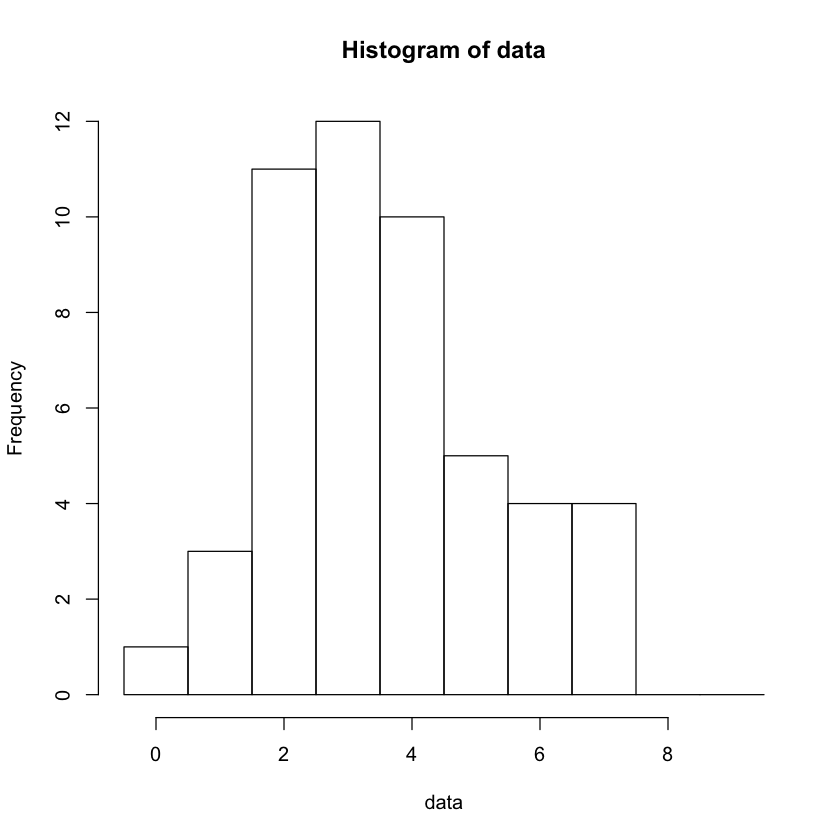

In [7]:
hist(data, breaks=seq(-0.5,9.5,1))

In [8]:
var(data)

[1] 2.986122

In [9]:
sd(data)

[1] 1.72804

In [10]:
sqrt(var(data))

[1] 1.72804

## 2.2 データと確率分布の対応関係をながめる

ポアソン分布の導入

In [12]:
# 平均3.56のポアソン分布を生成する
y <- 0:9
prob <- dpois(y, lambda=3.56)

In [15]:
cbind(y, prob)

y,prob
0.00000000,0.02843882
1.0000000,0.1012422
2.0000000,0.1802111
3.0000000,0.2138506
4.000000,0.190327
5.0000000,0.1355128
6.00000000,0.08040427
7.00000000,0.04089132
8.00000000,0.01819664
9.00000000,0.00719778


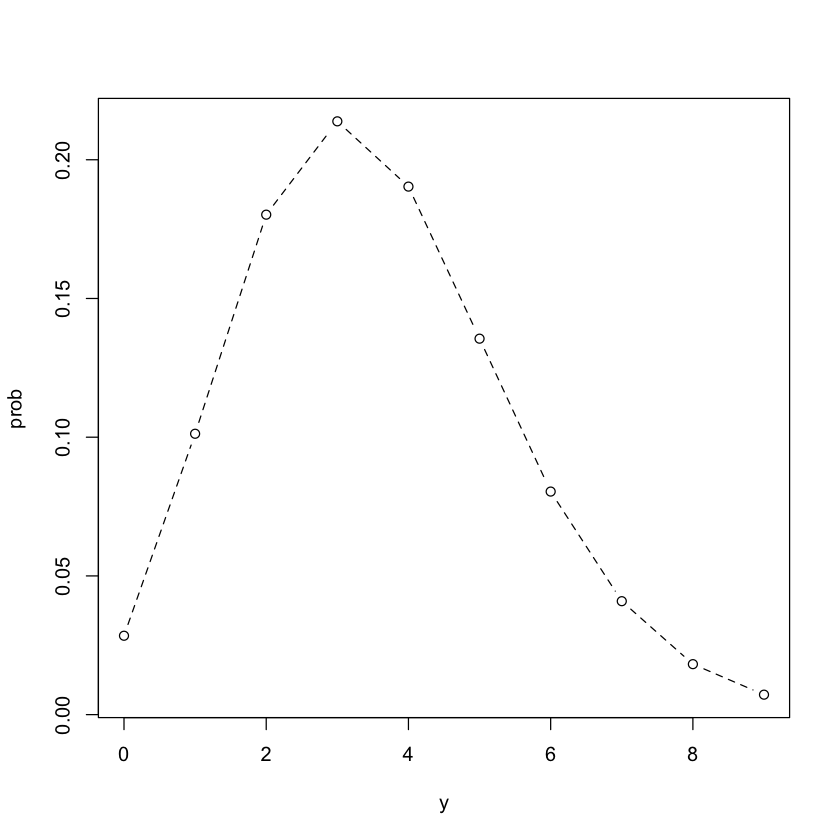

In [14]:
plot(y, prob, type="b", lty=2)

In [16]:
# 観測データと確率分布の複合描画（保留）

## 2.3 ポアソン分布とは何か？

## 2.4 ポアソン分布のパラメーターの最尤推定

尤度＝あてはまりの良さ　を表す統計量を最大にするようなパラメータを探そうとする、パラメータ推定方法
「ポアソン分布の形と、ヒストグラムがなるべく近くなる様に」

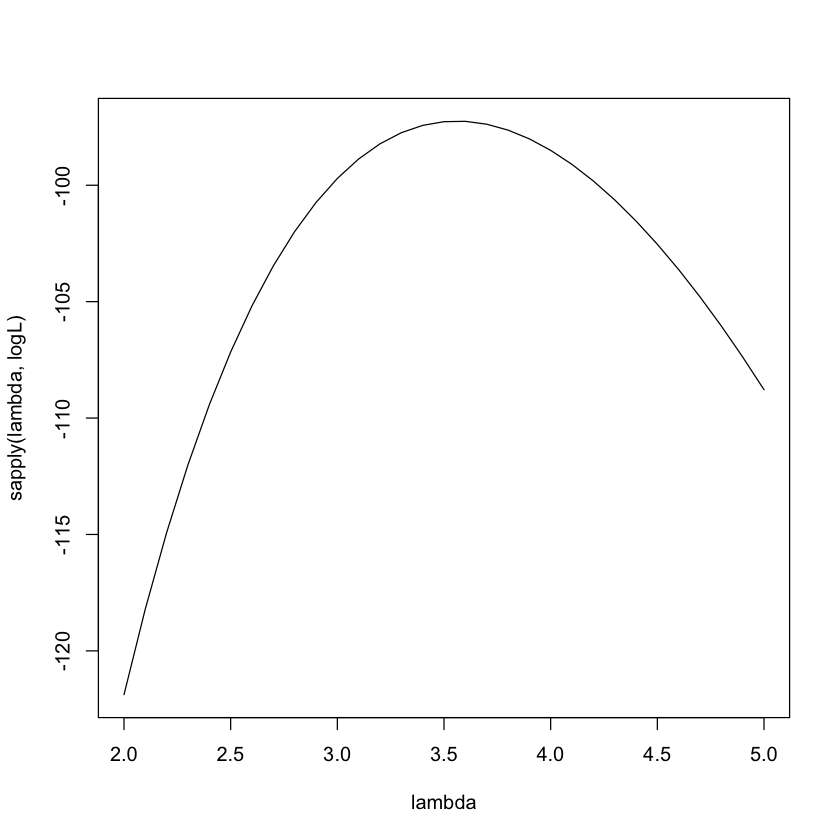

In [17]:
logL <- function(m) sum(dpois(data, m, log = TRUE))
lambda <- seq(2, 5, 0.1)
plot(lambda, sapply(lambda, logL), type = "l")

## 2.6 確率分布の選びかた

- 説明したい量は離散か連続か
- 説明したい量の範囲は
- 説明したい量の標本分散と標本平均の関係は


## 2.7 章のまとめ

- 確率分布にはさまざまなものがあるので、データの特徴にあわせて確率分布を選ぶ
- どんな確率分布を使った統計モデルでも、「データに対するあてはまりの良さ」を**対数尤度**で表わせる
- 最尤推定は、対数尤度を最大にするようなパラメータを探しだすこと
- すでに得られたデータにあてはまるパラメータを探しだすのが**推定**、次に得られるデータへのあてはまりを重視するのが**予測**
- 簡単な確率分布を「混ぜあわせ」、現実の複雑なばらつきに対処できる
- この章ではポアソン分布をカウントデータのばらつきを表現できる確率分布として導入

---
# 3. 一般化線形モデル(GLM)

## 3.2 観測されたデータの概要を調べる

In [18]:
d <- read.csv("data3a.csv")

In [19]:
d # i番目の個体の施肥処理、体サイズが、どの様に種子数へ影響するか知りたい

Warning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋮"): invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋮"): invalid factor level, NA generated

,y,x,f
1,6,8.31,C
2,6,9.44,C
3,6,9.5,C
4,12,9.07,C
5,10,10.16,C
6,4,8.32,C
7,9,10.61,C
8,9,10.06,C
9,9,9.93,C
10,11,10.43,C


In [22]:
d$y # 種子の数

[1]  6  6  6 12 10  4  9  9  9 11  6 10  6 10 11  8  3  8  5  5  4 11  5 10  6
 [26]  6  7  9  3 10  2  9 10  5 11 10  4  8  9 12  8  9  8  6  6 10 10  9 12  6
 [51] 14  6  7  9  6  7  9 13  9 13  7  8 10  7 12  6 15  3  4  6 10  8  8  7  5
 [76]  6  8  9  9  6  7 10  6 11 11 11  5  6  4  5  6  5  8  5  9  8  6  8  7  9

In [20]:
d$x # 個体の体サイズ

[1]  8.31  9.44  9.50  9.07 10.16  8.32 10.61 10.06  9.93 10.43 10.36 10.15
 [13] 10.92  8.85  9.42 11.11  8.02 11.93  8.55  7.19  9.83 10.79  8.89 10.09
 [25] 11.63 10.21  9.45 10.44  9.44 10.48  9.43 10.32 10.33  8.50  9.41  8.96
 [37]  9.67 10.26 10.36 11.80 10.94 10.25  8.74 10.46  9.37  9.74  8.95  8.74
 [49] 11.32  9.25 10.14  9.05  9.89  8.76 12.04  9.91  9.84 11.87 10.16  9.34
 [61] 10.17 10.99  9.19 10.67 10.96 10.55  9.69 10.91  9.60 12.37 10.54 11.30
 [73] 12.40 10.18  9.53 10.24 11.76  9.52 10.40  9.96 10.30 11.54  9.42 11.28
 [85]  9.73 10.78 10.21 10.51 10.73  8.85 11.20  9.86 11.54 10.03 11.88  9.15
 [97]  8.52 10.24 10.86  9.97

In [21]:
d$f # 施肥処理の有無

[1] C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C
 [38] C C C C C C C C C C C C C T T T T T T T T T T T T T T T T T T T T T T T T
 [75] T T T T T T T T T T T T T T T T T T T T T T T T T T
Levels: C T

In [23]:
# データオブジェクトの型を調べる
class(d)

[1] "data.frame"

In [24]:
class(d$y)

[1] "integer"

In [25]:
class(d$x)

[1] "numeric"

In [26]:
class(d$f)

[1] "factor"

In [27]:
# dataframeの概要を確認
summary(d)

       y               x          f     
 Min.   : 2.00   Min.   : 7.190   C:50  
 1st Qu.: 6.00   1st Qu.: 9.428   T:50  
 Median : 8.00   Median :10.155         
 Mean   : 7.83   Mean   :10.089         
 3rd Qu.:10.00   3rd Qu.:10.685         
 Max.   :15.00   Max.   :12.400         

## 3.3 統計モデリングの前にデータを図示する

- 体サイズx増加につれ、種子数yが増えているかな？
- 肥料有無fはなさそう

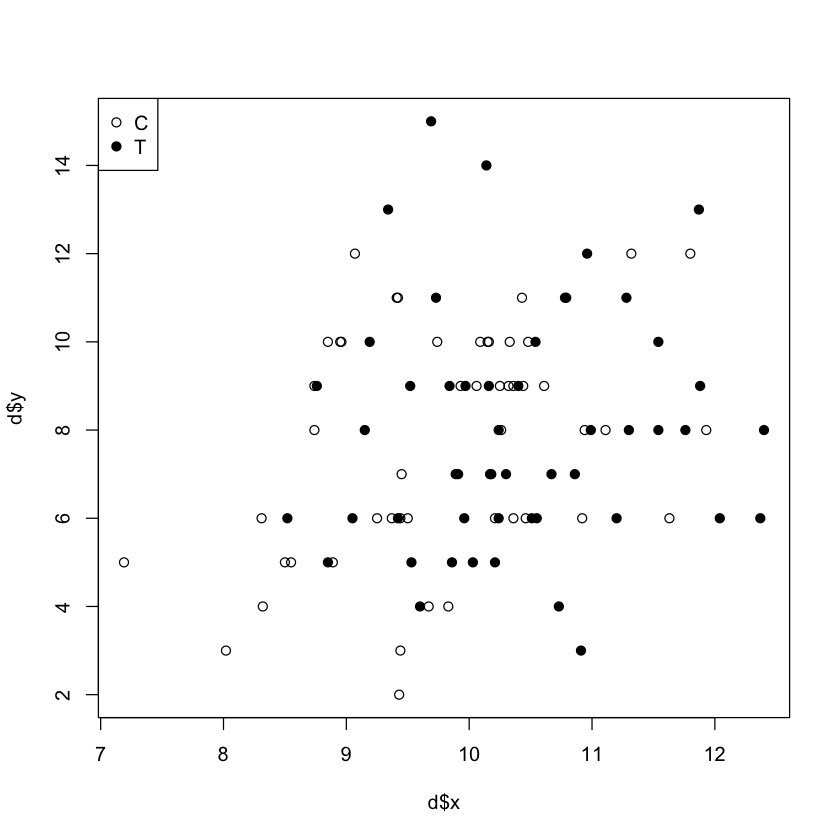

In [29]:
plot(d$x, d$y, pch = c(21, 19)[d$f])
legend("topleft", legend = c("C", "T"), pch = c(21, 19))

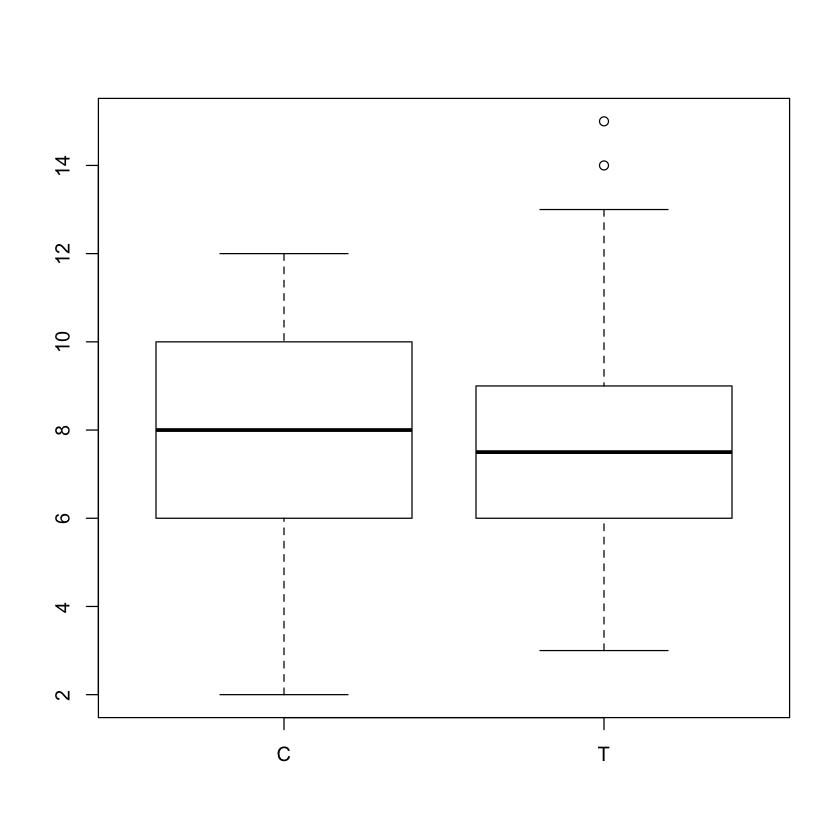

In [30]:
plot(d$f, d$y)

## 3.4 ポアソン回帰の統計モデル

In [32]:
fit <- glm(y ~ x, data = d, family = poisson) # 切片/傾きの最尤推定値を得る

In [33]:
fit # 概要


Call:  glm(formula = y ~ x, family = poisson, data = d)

Coefficients:
(Intercept)            x  
    1.29172      0.07566  

Degrees of Freedom: 99 Total (i.e. Null);  98 Residual
Null Deviance:	    89.51 
Residual Deviance: 84.99 	AIC: 474.8

In [34]:
summary(fit) # さらに詳細


Call:
glm(formula = y ~ x, family = poisson, data = d)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3679  -0.7348  -0.1775   0.6987   2.3760  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.29172    0.36369   3.552 0.000383 ***
x            0.07566    0.03560   2.125 0.033580 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 89.507  on 99  degrees of freedom
Residual deviance: 84.993  on 98  degrees of freedom
AIC: 474.77

Number of Fisher Scoring iterations: 4


In [35]:
logLik(fit) # 最大対数尤度の評価

'log Lik.' -235.3863 (df=2)

### 3.4.3 ポアソン回帰モデルによる予測

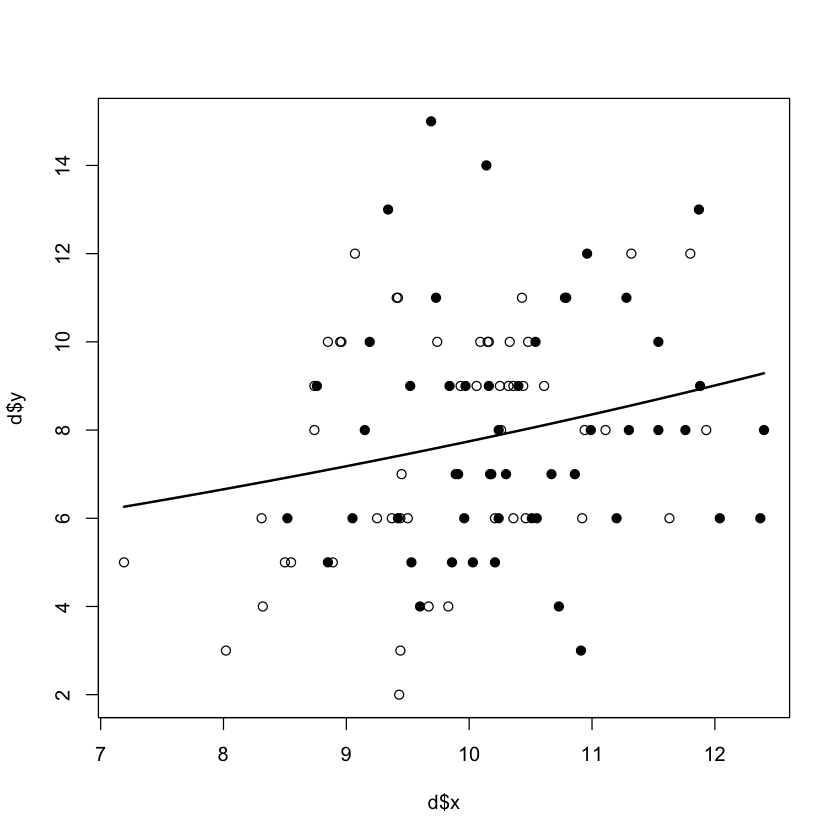

In [36]:
plot(d$x, d$y, pch = c(21, 19)[d$f])
xx <- seq(min(d$x), max(d$x), length = 100)
lines(xx, exp(1.29 + 0.0757 * xx), lwd = 2)

In [39]:
yy <- predict(fit, newdata = data.frame(x = xx), type = "response")
lines(xx, yy, lwd = 2)

ERROR: Error in plot.xy(xy.coords(x, y), type = type, ...): plot.new has not been called yet


## 3.5 説明変数が因子型の統計モデル

- 因子型の説明変数はダミー変数(1 or 0)に置き換える


In [40]:
# model

## 3.6 説明変数が数量型+因子型の統計モデル

In [41]:
# model

## 3.7 「何でも正規分布」、「何でも直線」には無理がある

- 強調したい**統計モデリングの方針** 強引な**変数変換を避け、yの構造に合せて**適切な確率分布を選ぶ

## 3.8 章のまとめ


---

# 4. GLMのモデル選択

---

# 5. GLMの尤度比検定と検定の非対称性

---

# 6. GLMの応用範囲を広げる

- ロジスティック回帰等

---

# 7. 一般化線形混合モデル(GLMM)

---

# 8. MCMC法とベイズ統計モデル

---

# 9. GLMのベイズモデル化と事後分布の推定

---

# 10. 階層ベイズモデル

- GLMMのベイズモデル化

---

# 11. 空間構造のある階層ベイズモデル

---
EOF